<a href="https://colab.research.google.com/github/VyomPandya/Summer-Internship-Sem-7/blob/main/Week_2_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Analysis

This notebook implements a machine learning pipeline to predict customer churn based on e-commerce transaction data.

## Project Overview

**Objective:** Predict whether a customer will churn (defined as no purchase in the last 6 months) based on their purchase history and behavior.

**Data Source:** E-commerce transaction data stored in `master_dataset.csv`.

## Implementation Steps

### 1. Data Preparation
- Loading transaction data with appropriate date parsing
- Defining churn (customers with no purchases in the last 180 days)
- Merging churn labels with the main dataset

### 2. Feature Engineering
The model uses the following features:
- **Tenure:** Duration between first and last purchase
- **Order Frequency:** Total number of orders per customer
- **Delivery Performance:** Average delivery time
- **Customer Satisfaction:** Number of complaints (reviews ≤ 2)
- **Purchase Behavior:** Average order value and freight costs

### 3. Data Preprocessing
- Handling missing values with median imputation
- Standardizing numeric features
- Train-test split (80% train, 20% test)

### 4. Model Training
Four different models are trained and compared:
1. **Logistic Regression:** A baseline linear model
2. **Random Forest:** An ensemble of decision trees
3. **XGBoost:** Gradient boosted decision trees
4. **Neural Network:** A simple deep learning model with:
   - 2 hidden layers (32 and 16 neurons)
   - ReLU activation
   - Dropout for regularization
   - Sigmoid output for binary classification

### 5. Model Evaluation
Each model is evaluated using:
- Accuracy
- Precision
- Recall
- ROC AUC Score
- Confusion Matrix
- ROC Curve Visualization

## Results and Insights

The model comparison allows identification of the best performing algorithm for churn prediction. Key performance indicators focus on:
- The ability to correctly identify customers at risk of churning (recall)
- Minimizing false positives to optimize retention campaign resources (precision)
- Overall discriminative power (ROC AUC)

## Business Applications

This churn prediction model can be used to:
1. Identify at-risk customers for targeted retention campaigns
2. Understand key factors contributing to customer churn
3. Optimize customer lifetime value through proactive engagement
4. Reduce customer acquisition costs by improving retention

## Future Improvements

Potential enhancements to consider:
- Feature importance analysis to identify key churn drivers
- Hyperparameter tuning for model optimization
- Cost-sensitive learning to account for imbalanced classes
- Temporal validation to test model stability over time
- A/B testing of retention strategies based on model predictions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Logistic Regression ---
Accuracy: 0.9998952934401341
Precision: 0.9998532756217445
Recall: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[ 5470     2]
 [    0 13629]]


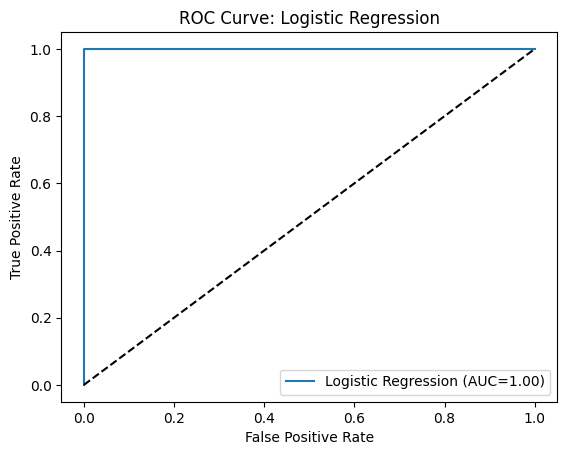

--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[ 5472     0]
 [    0 13629]]


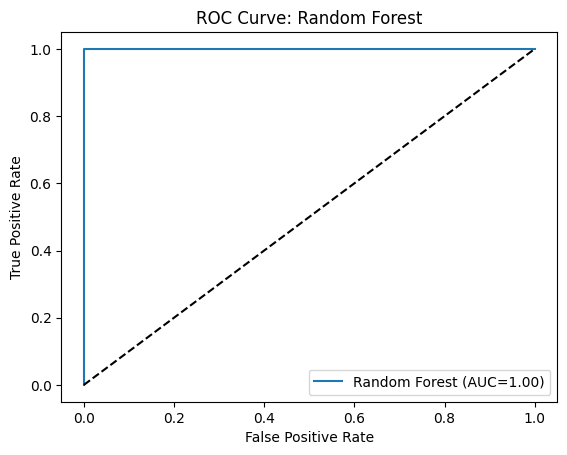

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:08:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Accuracy: 0.9972252761635516
Precision: 0.9983115548377625
Recall: 0.9977988113581334
ROC AUC: 0.9999804834912998
Confusion Matrix:
 [[ 5449    23]
 [   30 13599]]


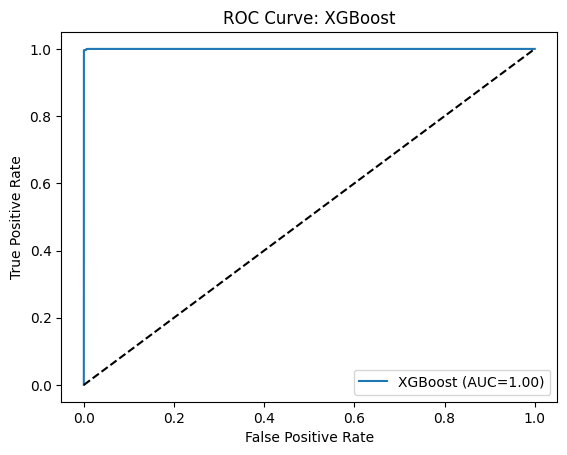

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1911/1911 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8965 - loss: 0.2472 - val_accuracy: 0.9937 - val_loss: 0.0271
Epoch 2/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9867 - loss: 0.0353 - val_accuracy: 0.9969 - val_loss: 0.0137
Epoch 3/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0203 - val_accuracy: 0.9976 - val_loss: 0.0089
Epoch 4/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0145 - val_accuracy: 0.9979 - val_loss: 0.0071
Epoch 5/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0110 - val_accuracy: 0.9982 - val_loss: 0.0068
Epoch 6/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9959 - loss: 0.0112 - val_accuracy: 0.9967 - val_loss: 0.0088
Epoch 7/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9961 - loss: 0.0100 - val_accuracy: 0.9976 - val_loss: 0.0074
Epoch 8/20
1911/1911 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0098 - val_accurac

In [ ]:
## Customer Churn Prediction in Google Colab

# 1. Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. (Re)Mount Google Drive if needed
from google.colab import drive
try:
    drive.mount('/content/drive')
except Exception:
    drive.mount('/content/drive', force_remount=True)

# 3. Load data (update path to your file)
file_path = '/content/drive/MyDrive/master_dataset.csv'
parse_dates = [
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
df = pd.read_csv(file_path, parse_dates=parse_dates)

# 4. Label churn: no purchase in last 6 months
last_date = df['order_purchase_timestamp'].max()
cust_last = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
cust_last['days_since_last'] = (last_date - cust_last['order_purchase_timestamp']).dt.days
cust_last['churn'] = np.where(cust_last['days_since_last'] > 180, 1, 0)

df = df.merge(cust_last[['customer_unique_id','churn','days_since_last']], on='customer_unique_id', how='left')

# 5. Feature engineering
# First purchase date
cust_first = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index().rename(columns={'order_purchase_timestamp':'first_purchase'})

# Base model_df
model_df = cust_last.merge(cust_first, on='customer_unique_id')
model_df['tenure_days'] = (model_df['order_purchase_timestamp'] - model_df['first_purchase']).dt.days

# Order frequency
orders_count = df.groupby('customer_unique_id')['order_id'].nunique().reset_index().rename(columns={'order_id':'num_orders'})
model_df = model_df.merge(orders_count, on='customer_unique_id')

# Delivery days
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days
avg_delivery = df.groupby('customer_unique_id')['delivery_days'].mean().reset_index()
model_df = model_df.merge(avg_delivery, on='customer_unique_id')

# Complaints
df['complaint'] = (df['review_score'] <= 2).astype(int)
complaints = df.groupby('customer_unique_id')['complaint'].sum().reset_index().rename(columns={'complaint':'num_complaints'})
model_df = model_df.merge(complaints, on='customer_unique_id')

# Price and freight
price_avg = df.groupby('customer_unique_id')['price'].mean().reset_index().rename(columns={'price':'avg_price'})
freight_avg = df.groupby('customer_unique_id')['freight_value'].mean().reset_index().rename(columns={'freight_value':'avg_freight'})
model_df = model_df.merge(price_avg, on='customer_unique_id').merge(freight_avg, on='customer_unique_id')

# 6. Prepare X,y and handle missing
y = model_df['churn']
X = model_df.drop(['customer_unique_id','churn','order_purchase_timestamp','first_purchase'], axis=1)

# Impute missing numeric with median
num_cols = X.select_dtypes(include=['int64','float64']).columns
imputer = SimpleImputer(strategy='median')
X[num_cols] = imputer.fit_transform(X[num_cols])

# Scale numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Evaluation helper
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test,y_proba):.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend()
    plt.show()

# 8a. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
evaluate_model('Logistic Regression', lr)

# 8b. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model('Random Forest', rf)

# 8c. XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
evaluate_model('XGBoost', xgb_clf)

# 9. Optional Neural Network
nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate NN
nn_proba = nn.predict(X_test).ravel()
nn_pred = (nn_proba > 0.5).astype(int)
print("--- Neural Network ---")
print("Accuracy:", accuracy_score(y_test, nn_pred))
print("Precision:", precision_score(y_test, nn_pred))
print("Recall:", recall_score(y_test, nn_pred))
print("ROC AUC:", roc_auc_score(y_test, nn_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, nn_pred))